In [1]:
import numpy as np
import time 
import statistics

In [2]:
## define node strucutre
class Node:
    def __init__(self,parent,position):
        self.parent = parent
        self.position = position
        self.f = 0
        self.g = 0
        self.h = 0
        
    def __lt__(self,other):
        return self.f <= other.f

In [3]:
## define search function 
def man_search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)
        

In [4]:
## define path function 
# def path_finder(current_node,grid):
#     print('current_node from path_finder',current_node.position)
import math    
    
    
## define search function 
def euc_search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: Euclidean 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = math.sqrt(pow(children.position[0]-end_node.position[0],2)+ pow(children.position[1]-end_node.position[1],2))
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)



In [5]:
## define path function 
# def path_finder(current_node,grid):
#     print('current_node from path_finder',current_node.position)
import math    
    
    
## define search function 
def che_search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: Chebyshev 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = max(abs(children.position[0]-end_node.position[0]), abs(children.position[1]-end_node.position[1]))
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)


In [6]:
def path_finder(current_node,grid,start_node,end_node):
    path = []
    
    current = current_node
    
    while current:
        
        path.append(current.position)
        
        current = current.parent
        
    path = path[::-1]
    
    if path[0] == start_node.position and path[-1] == end_node.position:
        return path
    else:
        return "Path is not found"




In [7]:
import random

## maze function --> 101 x 101 
## '0' walkable
## '1' block
def create_maze(nx,ny,p_val):
    ##empty maze, all values are 0
    maze = [[0 for j in range(nx)]for i in range(ny)]
    
    ## loop each cell, calculate p value, resign val
    for i in range(nx):
        for j in range(ny):
            prob_test_for_each_blck = random.uniform(0, 1)
            if prob_test_for_each_blck <= p_val:
                maze[i][j] = 1 
    maze[0][0] = 0
    maze[nx-1][ny-1] = 0
    return maze


In [8]:
def man_q5(nx,ny,cost,p_val):
    return_result = []
    pass_lst = []
    avg_solv = []
    for x in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [nx-1,ny-1]
        maze = [[0 for j in range(nx)]for i in range(ny)]
        blank_route = blank_space_a_star(maze,start,end,cost)
        repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
        
        grid = create_maze(nx,ny,p_val)
        start_time = time.time()
        result = man_search(grid,start,end,cost)
        end_time = time.time()
        total_time = end_time - start_time
        if result != 'Path is not found':
            pass_lst.append(total_time)
        else:
            continue
    avg_time = statistics.mean(pass_lst)
    return [nx,avg_time]



In [9]:
def euc_q5(nx,ny,cost,p_val):
    return_result = []
    pass_lst = []
    avg_solv = []
    for x in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [nx-1,ny-1]
        start_time = time.time()
        result = euc_search(grid,start,end,cost)
        end_time = time.time()
        total_time = end_time - start_time
        if result != 'Path is not found':
            pass_lst.append(total_time)
        else:
            continue
    avg_time = statistics.mean(pass_lst)
    return [nx,avg_time]


In [10]:
def che_q5(nx,ny,cost,p_val):
    return_result = []
    pass_lst = []
    avg_solv = []
    for x in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [nx-1,ny-1]
        start_time = time.time()
        result = che_search(grid,start,end,cost)
        end_time = time.time()
        total_time = end_time - start_time
        if result != 'Path is not found':
            pass_lst.append(total_time)
        else:
            continue
    avg_time = statistics.mean(pass_lst)
    return [nx,avg_time]



In [14]:
if __name__ == "__main__":
    cost = 1
    result_lst_man = []
    result_lst_euc = []
    result_lst_che = []
    for x in np.arange(5,101,10):
        nx = x 
        ny = x 
        result_lst_che.append(che_q5(nx,ny,cost,p_val=0.2))
        
    for x in np.arange(5,101,10):
        nx = x 
        ny = x 
        result_lst_man.append(man_q5(nx,ny,cost,p_val=0.2))
        
    for x in np.arange(5,101,10):
        nx = x 
        ny = x 
        result_lst_euc.append(euc_q5(nx,ny,cost,p_val=0.2))
        
        


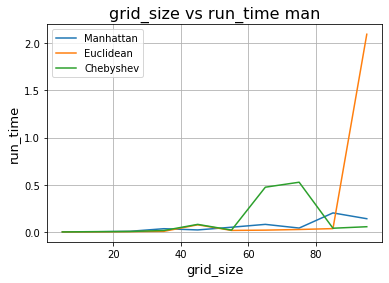

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x[0] for x in result_lst_man]
y_man = [y[1] for y in result_lst_man]
y_euc = [y[1] for y in result_lst_euc]
y_che = [y[1] for y in result_lst_che]

fig, ax = plt.subplots()
ax.set_title("grid_size vs run_time man", fontsize='16')
ax.plot(x, y_man)
ax.plot(x, y_euc)
ax.plot(x, y_che)
# plt.set_title('Run Time Between Three Functions')
ax.legend(['Manhattan','Euclidean','Chebyshev'])
ax.xaxis.set_label_text("grid_size",fontsize='13')
ax.yaxis.set_label_text("run_time",fontsize='13')
plt.grid()
plt.show()